In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import random
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the train dataset
data1=pd.read_csv("Train_Beneficiarydata.csv",encoding='UTF-8')
data2=pd.read_csv("Train_Inpatientdata.csv",encoding='UTF-8')
data3=pd.read_csv("Train_Outpatientdata.csv",encoding='UTF-8')
data4=pd.read_csv("Train.csv",encoding='UTF-8')

#importing the test dataset
data5=pd.read_csv("Test_Beneficiarydata.csv",encoding='UTF-8')
data6=pd.read_csv("Test_Inpatientdata.csv",encoding='UTF-8')
data7=pd.read_csv("Test_Outpatientdata.csv",encoding='UTF-8')
data8=pd.read_csv("Test.csv",encoding='UTF-8')

In [3]:
#duplicates in datasets

print("duplicates: ",data1.duplicated().sum())
print("duplicates: ",data2.duplicated().sum())
print("duplicates: ",data3.duplicated().sum())
print("duplicates: ",data4.duplicated().sum())

print("duplicates: ",data5.duplicated().sum())
print("duplicates: ",data6.duplicated().sum())
print("duplicates: ",data7.duplicated().sum())
print("duplicates: ",data8.duplicated().sum())

duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0


In [4]:
#shape of train
print("data1: ",data1.shape)
print("data2: ",data2.shape)
print("data3: ",data3.shape)
print("data4: ",data4.shape)

#shape of test
print("data5: ",data5.shape)
print("data6: ",data6.shape)
print("data7: ",data7.shape)
print("data8: ",data8.shape)

data1:  (138556, 25)
data2:  (40474, 30)
data3:  (517737, 27)
data4:  (5410, 2)
data5:  (63968, 25)
data6:  (9551, 30)
data7:  (125841, 27)
data8:  (1353, 1)


In [5]:
data1.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
data2.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
data3.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
data4.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [9]:
data5.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [10]:
data6.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data7.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [12]:
data8.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [13]:
data1.info()
data2.info()
data3.info()
data4.info()

data5.info()
data6.info()
data7.info()
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [14]:
print(data1.isnull().sum())
print("******************************************")
print(data2.isnull().sum())
print("******************************************")
print(data3.isnull().sum())
print("******************************************")
print(data4.isnull().sum())
print("******************************************")
print("******************************************")
print(data5.isnull().sum())
print("******************************************")
print(data6.isnull().sum())
print("******************************************")
print(data7.isnull().sum())
print("******************************************")
print(data8.isnull().sum())

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [15]:
#replacing dates with age
data1['DOB']=pd.to_datetime(data1['DOB'],format = '%Y-%m-%d')
data1['DOD']=pd.to_datetime(data1['DOD'],format = '%Y-%m-%d',errors='ignore')
data1['Age']=round(((data1['DOD']-data1['DOB']).dt.days)/365)

data5['DOB']=pd.to_datetime(data5['DOB'],format = '%Y-%m-%d')
data5['DOD']=pd.to_datetime(data5['DOD'],format = '%Y-%m-%d',errors='ignore')
data5['Age']=round(((data5['DOD']-data5['DOB']).dt.days)/365)

data1.Age.fillna(round(((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-data1['DOB']).dt.days)/365),inplace=True)
data5.Age.fillna(round(((pd.to_datetime('2009-12-01',format='%Y-%m-%d')-data5['DOB']).dt.days)/365),inplace=True)

In [16]:
data3_columns=data3.columns.tolist()
print(data3_columns)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']


In [17]:
data2=data2[data3_columns]
data6=data6[data3_columns]

In [18]:
#concating dataset outpatient and inpatient
data2=pd.concat([data2,data3])
data6=pd.concat([data6,data7])

In [19]:
#replacing the dates with "Claim Days"
data2['ClaimStartDt']=pd.to_datetime(data2['ClaimStartDt'],format = '%Y-%m-%d')
data2['ClaimEndDt']=pd.to_datetime(data2['ClaimEndDt'],format = '%Y-%m-%d')
data2['ClaimDays']=((data2['ClaimEndDt'] - data2['ClaimStartDt']).dt.days)+1

data6['ClaimStartDt']=pd.to_datetime(data6['ClaimStartDt'],format = '%Y-%m-%d')
data6['ClaimEndDt']=pd.to_datetime(data6['ClaimEndDt'],format = '%Y-%m-%d')
data6['ClaimDays']=((data6['ClaimEndDt'] - data6['ClaimStartDt']).dt.days)+1

#train data
data1.drop('DOD',axis=1,inplace=True)
data1.drop('DOB',axis=1,inplace=True)

data2.drop('ClaimStartDt',axis=1,inplace=True)
data2.drop('ClaimEndDt',axis=1,inplace=True)

#test data
data5.drop('DOD',axis=1,inplace=True)
data5.drop('DOB',axis=1,inplace=True)

data6.drop('ClaimStartDt',axis=1,inplace=True)
data6.drop('ClaimEndDt',axis=1,inplace=True)

In [20]:
print("**************TRAIN DATA 1 ****************")
print((data1.isna().sum()/len(data1))*100)
print("**************TEST DATA 5 ****************")
print((data5.isna().sum()/len(data1))*100)

**************TRAIN DATA 1 ****************
BeneID                             0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
Age                                0.0
dtype: float64
*****

In [21]:
print("**************TRAIN DATA 2 ****************")
print((data2.isna().sum()/len(data2))*100)
print("**************TEST DATA 6 ****************")
print((data6.isna().sum()/len(data6))*100)

**************TRAIN DATA 2 ****************
BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.270149
OperatingPhysician         79.497538
OtherPhysician             64.218548
ClmDiagnosisCode_1          1.872589
ClmDiagnosisCode_2         35.041588
ClmDiagnosisCode_3         56.458221
ClmDiagnosisCode_4         70.524407
ClmDiagnosisCode_5         79.949517
ClmDiagnosisCode_6         84.881702
ClmDiagnosisCode_7         88.144805
ClmDiagnosisCode_8         90.425843
ClmDiagnosisCode_9         92.509105
ClmDiagnosisCode_10        99.102490
ClmProcedureCode_1         95.824160
ClmProcedureCode_2         99.016501
ClmProcedureCode_3         99.826410
ClmProcedureCode_4         99.978861
ClmProcedureCode_5         99.998388
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.161050
ClmAdmitDiagnosisCode      73.863109
ClaimDays                   0.0

In [22]:
x1=(data2.isna().sum()/len(data2))*100
col_Todrop_data2=x1[x1> 80].index.tolist()

In [23]:
for i in col_Todrop_data2:
    data2.drop(i,axis=1,inplace=True)
    data6.drop(i,axis=1,inplace=True)

In [24]:
d2=data2.loc[:, data2.isna().sum()>0]
print(d2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 558211 entries, 0 to 517736
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AttendingPhysician     556703 non-null  object 
 1   OperatingPhysician     114447 non-null  object 
 2   OtherPhysician         199736 non-null  object 
 3   ClmDiagnosisCode_1     547758 non-null  object 
 4   ClmDiagnosisCode_2     362605 non-null  object 
 5   ClmDiagnosisCode_3     243055 non-null  object 
 6   ClmDiagnosisCode_4     164536 non-null  object 
 7   ClmDiagnosisCode_5     111924 non-null  object 
 8   DeductibleAmtPaid      557312 non-null  float64
 9   ClmAdmitDiagnosisCode  145899 non-null  object 
dtypes: float64(1), object(9)
memory usage: 46.8+ MB
None


In [25]:
arrC=['AttendingPhysician','OperatingPhysician','OtherPhysician','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4'
                           ,'ClmDiagnosisCode_5','ClmAdmitDiagnosisCode']
arrN=['DeductibleAmtPaid']  #arrC: all catergorical values arrN: all numerical values
data2 = data2.reset_index(drop=True)
knn_imputer=KNNImputer(n_neighbors=5)

chunk_size=1000  #will impute 1000 at a time since dataset is large it takes time

for i in range(0,len(data2),chunk_size):
    chunk_data=data2.iloc[i:i+chunk_size]
    imputed_chunk=knn_imputer.fit_transform(chunk_data[arrN])

    data2.loc[i:i+chunk_size-1,arrN]=imputed_chunk

for i in arrC:
    categories=data2[i].dropna().unique()

In [26]:
#merging the datset on beneficiary ID
merged_data_1=pd.merge(data2, data1, on='BeneID', how='left')
test_merged_data_1=pd.merge(data6, data5, on='BeneID', how='left')

In [27]:
merged_data_1.isna().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
DeductibleAmtPaid                       0
ClmAdmitDiagnosisCode              412312
ClaimDays                               0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure          

In [28]:
print("the inpatient and outpatient shape: ",merged_data_1.shape)
print("the test inpatient and outpatient shape: ",test_merged_data_1.shape)

the inpatient and outpatient shape:  (558211, 38)
the test inpatient and outpatient shape:  (135392, 38)


In [29]:
#merging the dataset on Provider
Final_data=pd.merge(merged_data_1, data4, on='Provider', how='right')
Final_data_test=pd.merge(test_merged_data_1, data8, on='Provider', how='right')

In [30]:
print("the final shape: ",Final_data.shape)
print("final test shape: ",Final_data_test.shape)
Final_data.isna().sum()

the final shape:  (558211, 39)
final test shape:  (135392, 38)


BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
DeductibleAmtPaid                       0
ClmAdmitDiagnosisCode              412312
ClaimDays                               0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure          

In [31]:
Final_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE36012,CLM58316,PRV51001,36000,PHY340163,NaN,NaN,29650,2971,3051,...,1,2,2,1,36000,1068,3520,140,69.0,No
1,BENE38773,CLM52334,PRV51001,12000,PHY346762,NaN,NaN,0388,5849,2841,...,2,2,2,2,95000,2136,2270,900,72.0,No
2,BENE98831,CLM36844,PRV51001,3000,PHY383193,NaN,NaN,56211,5533,0088,...,1,2,1,2,3000,1068,0,0,75.0,No
3,BENE102690,CLM49733,PRV51001,42000,PHY383193,PHY378091,PHY389113,4241,42731,4168,...,1,2,1,2,143800,4272,880,70,80.0,No
4,BENE152088,CLM37205,PRV51001,4000,PHY402229,PHY329739,NaN,85222,2724,3310,...,1,2,1,1,111710,4272,80,70,96.0,No


In [32]:
Final_data.nunique()

BeneID                             138556
ClaimID                            558211
Provider                             5410
InscClaimAmtReimbursed                438
AttendingPhysician                  82063
OperatingPhysician                  35315
OtherPhysician                      46457
ClmDiagnosisCode_1                  10450
ClmDiagnosisCode_2                   5300
ClmDiagnosisCode_3                   4756
ClmDiagnosisCode_4                   4359
ClmDiagnosisCode_5                   3970
DeductibleAmtPaid                      18
ClmAdmitDiagnosisCode                4098
ClaimDays                              37
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure          

In [33]:
#Encoding the dataset
from sklearn.preprocessing import LabelEncoder
arr1=Final_data.columns.tolist()
arr1.remove("PotentialFraud")
#encoding using LabelEncoder
for i in arr1:
    sampler1=LabelEncoder()
    sampler2=LabelEncoder()
    Final_data[i]=sampler1.fit_transform(Final_data[i])
    Final_data_test[i]=sampler2.fit_transform(Final_data_test[i])

Final_data['PotentialFraud']=Final_data['PotentialFraud'].map({'Yes':1,'No':0})

In [34]:
Final_data_test.shape

(135392, 38)

In [35]:
Final_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,78757,402690,0,361,19481,35315,46457,2214,992,946,...,0,1,1,0,1947,1,358,14,43,0
1,81332,349611,0,298,23883,35315,46457,192,2566,717,...,1,1,1,1,2929,16,233,92,46,0
2,137459,212548,0,158,48046,35315,46457,4972,2403,4,...,0,1,0,1,138,1,6,0,49,0
3,2520,326625,0,367,48046,19353,29577,4020,1896,1597,...,0,1,0,1,2995,43,94,7,54,0
4,52713,215768,0,183,60753,5447,46457,8267,731,1046,...,0,1,0,0,2961,43,14,7,70,0


<Axes: >

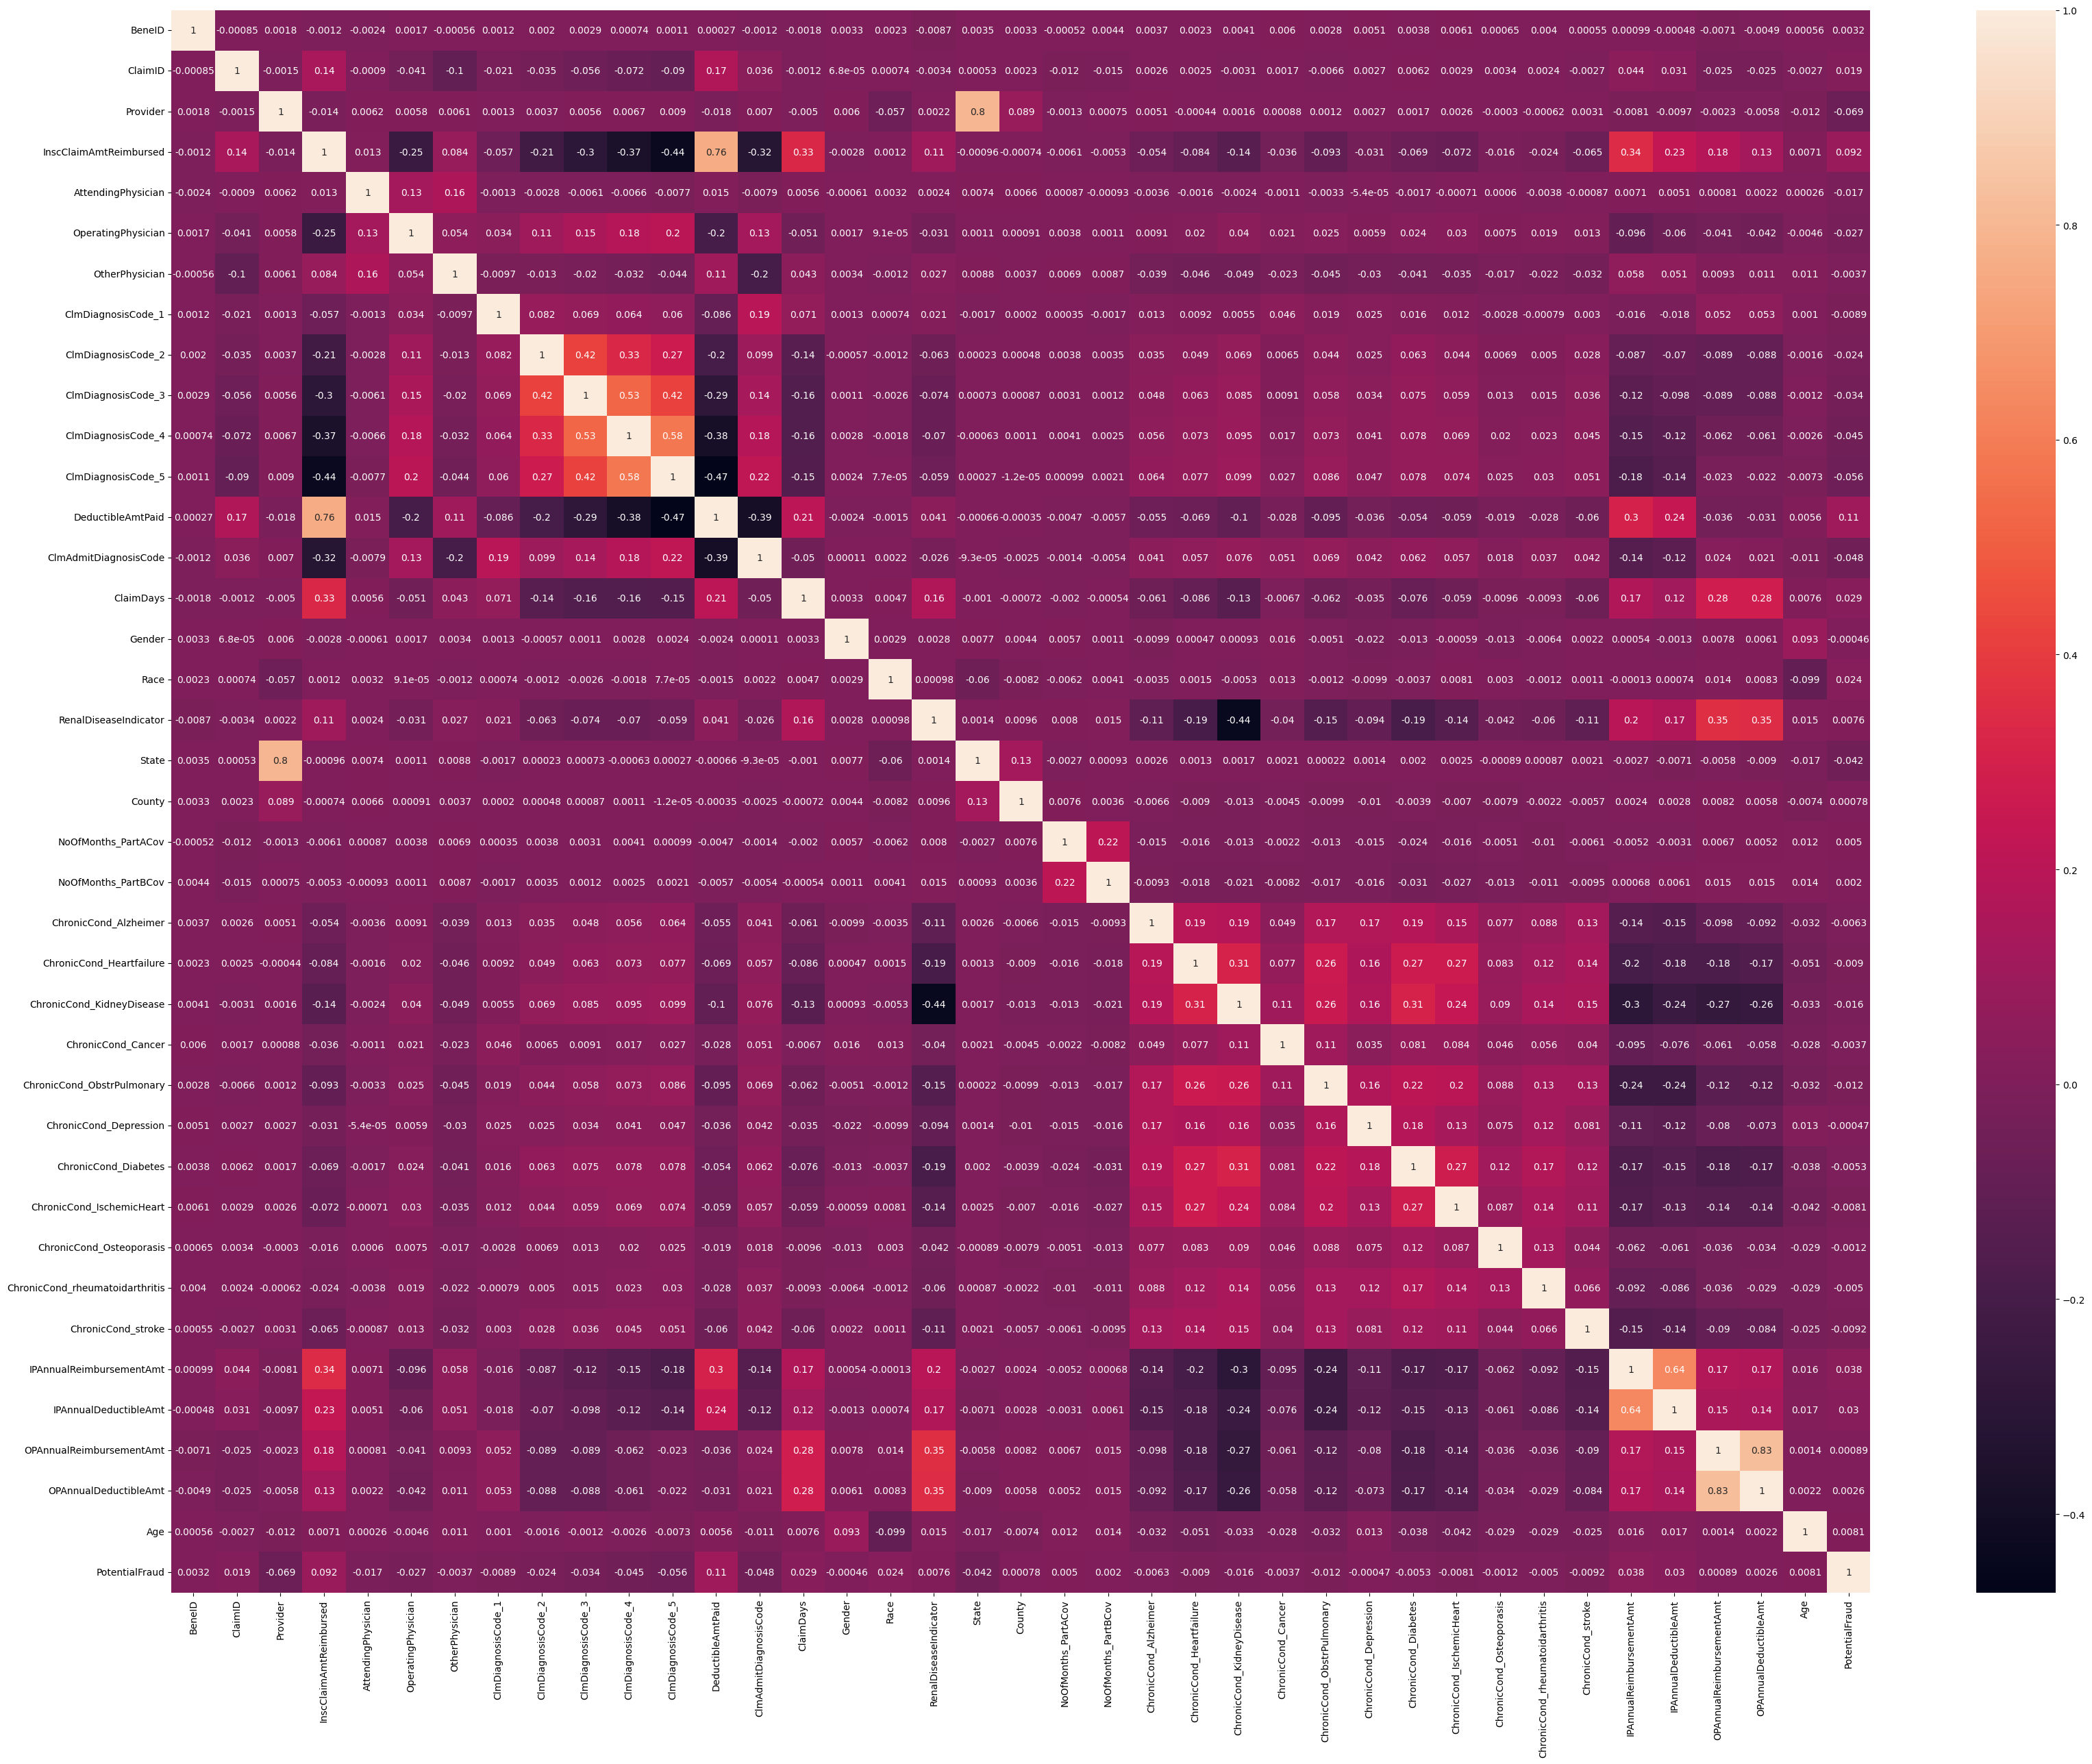

In [36]:
plt.figure(figsize=(40,30))
sns.heatmap(Final_data.corr(),annot=True)

Now we finally have a usable dataset 

In [37]:
 from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
X1=Final_data.iloc[:,:-1]
y1=Final_data.iloc[:,-1]

In [39]:
X1_resampled,y1_resampled=RandomUnderSampler().fit_resample(X1,y1)

In [40]:
from collections import Counter
print(Counter(y1_resampled))

Counter({0: 212796, 1: 212796})


In [41]:
print(X1_resampled.shape)
print(y1_resampled.shape)

(425592, 38)
(425592,)


In [42]:
X1_standardised=StandardScaler().fit_transform(X1_resampled)

In [43]:
print(X1_standardised.shape)
print(y1_resampled.shape)

(425592, 38)
(425592,)


In [44]:
X1_proccessed=pd.DataFrame(X1_standardised,columns=arr1)
y1_proccessed=pd.DataFrame(y1_resampled,columns=['PotentialFraud'])

X1_proccessed=X1_proccessed.reset_index(drop=True)
y1_proccessed=y1_proccessed.reset_index(drop=True)

Final_data_proccessed=pd.concat([X1_proccessed,y1_proccessed],axis=1)
Final_data_proccessed.shape

(425592, 39)

In [45]:
Final_data_proccessed.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,-1.376787,0.987952,0.898312,0.270770,0.678691,0.429533,0.607993,0.082052,-0.317294,-1.121917,...,-0.562197,0.682307,0.673313,0.337339,-0.492525,-0.323666,1.103956,0.681021,0.859950,0
1,1.200634,1.152751,1.312937,-0.477882,-0.477581,0.429533,-1.757072,-0.394721,0.758480,0.718717,...,-0.562197,0.682307,-1.485193,0.337339,-0.492525,-0.323666,-0.498480,-0.588586,0.091462,0
2,-0.919570,1.630269,-0.057720,-0.477882,1.221132,0.429533,-1.980265,-1.265043,0.882003,-2.036696,...,1.778735,-1.465617,0.673313,0.337339,-0.492525,-0.323666,0.547601,-0.488617,0.859950,0
3,-0.719608,0.156670,-0.789945,0.825327,-0.138771,-1.791085,0.607993,-0.817920,0.997104,0.718717,...,-0.562197,0.682307,0.673313,0.337339,-0.492525,-0.323666,-0.358558,-0.068747,0.091462,0
4,-1.293934,-1.340945,-0.863685,-0.505610,-0.445666,0.429533,0.607993,1.496872,-0.196578,0.551268,...,-0.562197,0.682307,0.673313,0.337339,-0.492525,-0.323666,-0.052063,0.930943,-0.677027,0


In [46]:
Final_data_proccessed.isna().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
DeductibleAmtPaid                  0
ClmAdmitDiagnosisCode              0
ClaimDays                          0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
C

In [47]:
print("duplicates: ",Final_data_proccessed.duplicated().sum())

duplicates:  0


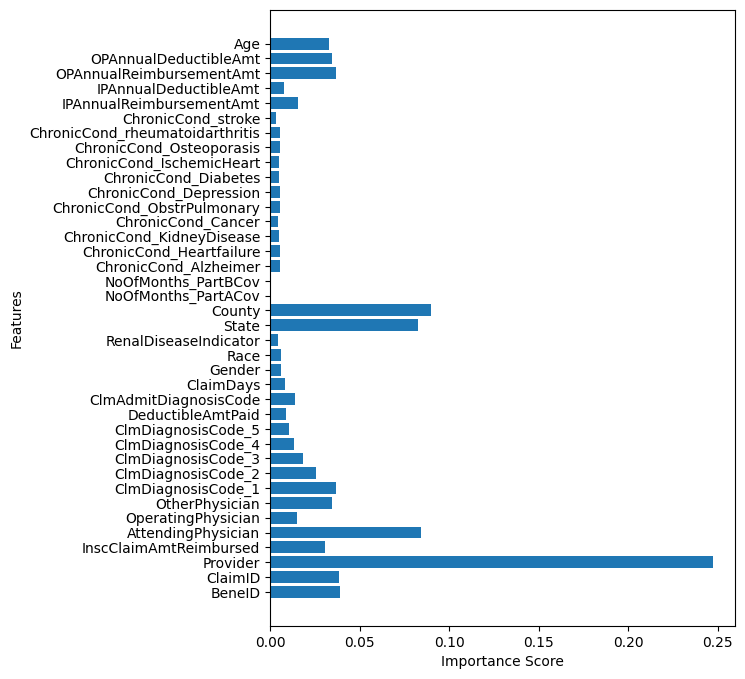

In [48]:
#manual feature selection
X1=Final_data_proccessed.iloc[:,:-1]
y1=Final_data_proccessed.iloc[:,-1]

rf1=RandomForestClassifier(n_estimators=60,random_state=42)
rf1.fit(X1,y1)

plt.figure(figsize=(6,8))
feature_names = list(arr1)
plt.barh(feature_names, rf1.feature_importances_)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [49]:
arr=rf1.feature_importances_.tolist()
arr.sort(reverse=True)
print(arr)

[0.24740781572159695, 0.09009110439615448, 0.08438692069671705, 0.08252319550997998, 0.03905429702731654, 0.03851893095285027, 0.03674025204253761, 0.036672349565521026, 0.034567248919303316, 0.03434752867628192, 0.03304430941845369, 0.030438008821092304, 0.025600247281647504, 0.01847748142291004, 0.01572484690928949, 0.015148145307437666, 0.014133471567073343, 0.01362997868557401, 0.010510478595726886, 0.008827784503764471, 0.008385159552290817, 0.007840158917991648, 0.006017068341937589, 0.005982167978438933, 0.005722216006406866, 0.0056695719707142555, 0.00560981459066591, 0.005568517749894013, 0.0054872646723920174, 0.0053095842286797965, 0.005162306197055581, 0.005015623608885031, 0.004949020114433925, 0.004274494158838534, 0.00424990225429441, 0.0035398670675533743, 0.0007803378951369964, 0.0005925286731618185]


In [50]:
threshold=0.02
selected_columns = np.where(rf1.feature_importances_ > threshold)[0]

# Get the names of selected features
selected_features_1=Final_data_proccessed.columns[selected_columns]  

print("Selected features:",selected_features_1)

Selected features: Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'State', 'County', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age'],
      dtype='object')


In [51]:
X1=Final_data_proccessed.loc[:,selected_features_1]
Final_data_test=Final_data_test.loc[:,selected_features_1]
y1=pd.DataFrame(y1,columns=['PotentialFraud'])

New_data=pd.concat([X1,y1],axis=1)

In [52]:
New_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,-1.376787,0.987952,0.898312,0.270770,0.678691,0.607993,0.082052,-0.317294,0.945399,-1.012894,1.103956,0.681021,0.859950,0
1,1.200634,1.152751,1.312937,-0.477882,-0.477581,-1.757072,-0.394721,0.758480,1.283071,0.798318,-0.498480,-0.588586,0.091462,0
2,-0.919570,1.630269,-0.057720,-0.477882,1.221132,-1.980265,-1.265043,0.882003,-0.067615,1.283209,0.547601,-0.488617,0.859950,0
3,-0.719608,0.156670,-0.789945,0.825327,-0.138771,0.607993,-0.817920,0.997104,-0.742958,-0.827495,-0.358558,-0.068747,0.091462,0
4,-1.293934,-1.340945,-0.863685,-0.505610,-0.445666,0.607993,1.496872,-0.196578,-0.810492,-0.000327,-0.052063,0.930943,-0.677027,0


In [53]:
New_data.isna().sum()

BeneID                      0
ClaimID                     0
Provider                    0
InscClaimAmtReimbursed      0
AttendingPhysician          0
OtherPhysician              0
ClmDiagnosisCode_1          0
ClmDiagnosisCode_2          0
State                       0
County                      0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
Age                         0
PotentialFraud              0
dtype: int64

In [54]:
New_data.shape

(425592, 14)

In [55]:
Final_data_test.shape

(135392, 13)

In [56]:
Final_data_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,15420,3909,0,10,18781,10161,3682,2591,0,81,133,59,49
1,18170,10585,0,4,15503,12096,5816,3360,0,18,104,92,63
2,18170,47430,0,7,7224,12096,7887,3301,0,18,104,92,63
3,18170,80208,0,10,9669,12096,3262,3610,0,18,104,92,63
4,21235,31925,0,40,15879,1927,513,3610,0,87,154,73,23


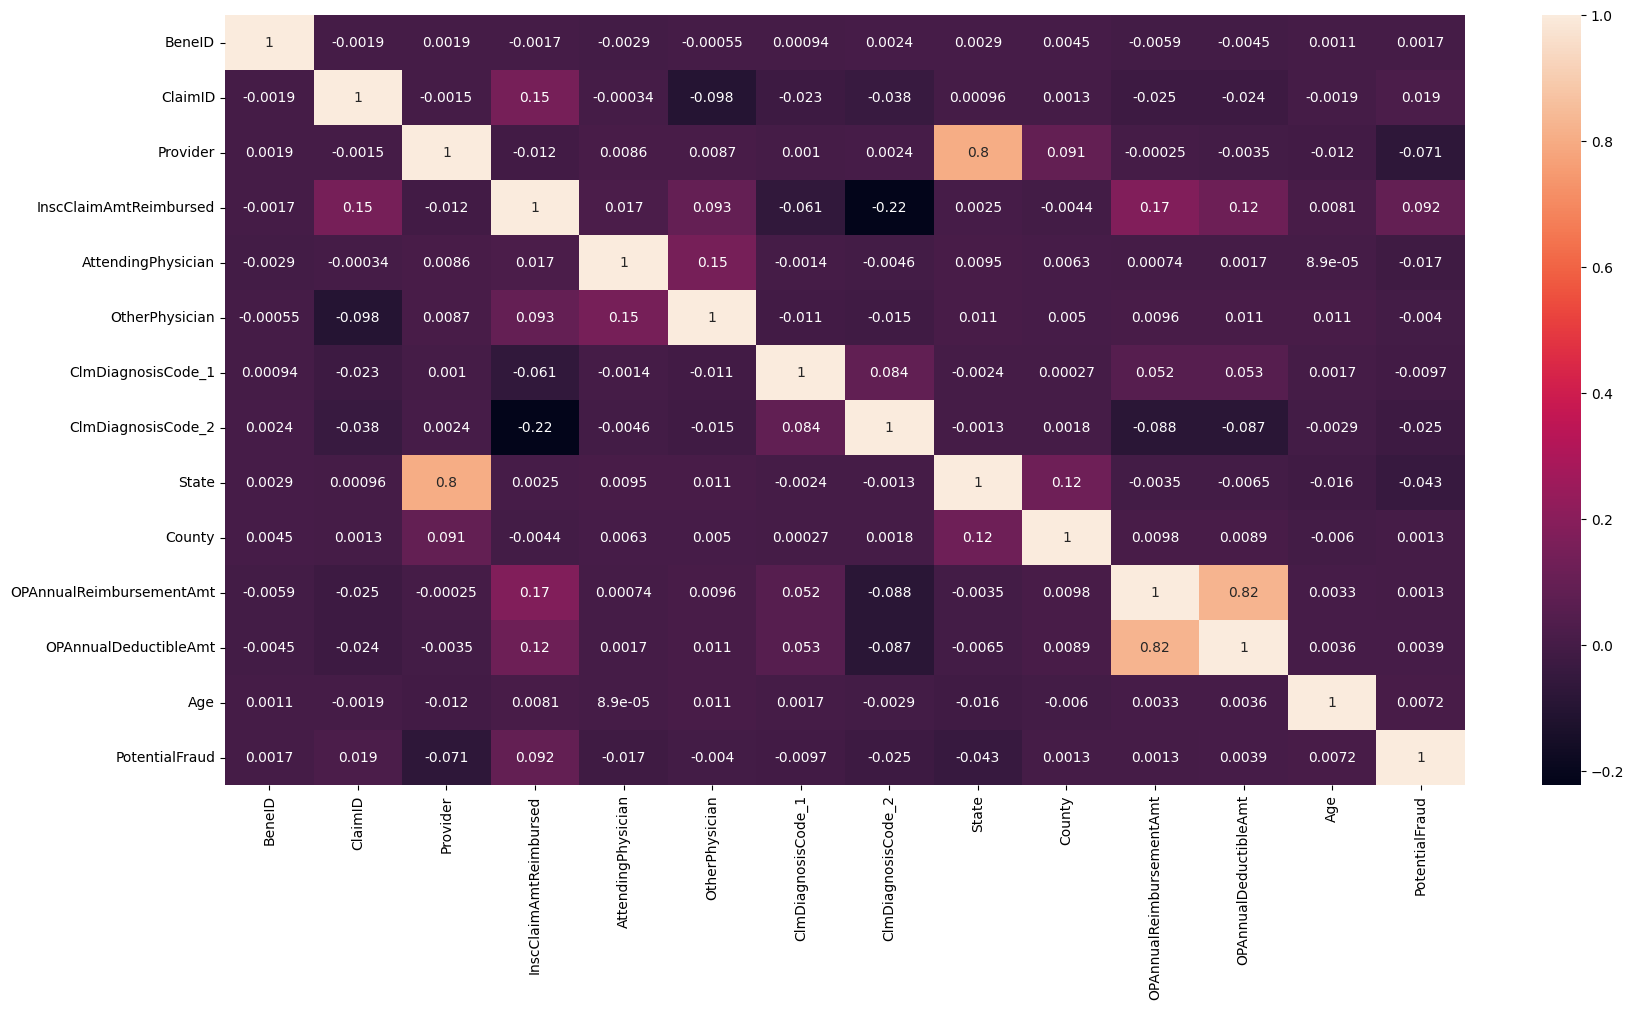

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(New_data.corr(),annot=True)
plt.show()

In [58]:
#splisting the datset into train and test
X2=New_data.iloc[:,:-1]
y2=New_data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=0.3,random_state=42)

Decision Tree Classifier and it's results

In [59]:
dtc=DecisionTreeClassifier()

scores = cross_val_score(dtc,X_train,y_train,cv=5,scoring='accuracy')
# Printing the scores
print("Accuracy scores:",scores)
print("the Training accuracy:",scores.mean()*100)

dtc.fit(X_train,y_train)
predict2=dtc.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,predict2)*100)
print("the f1 score is : ",f1_score(y_test, predict2)*100)  #f1 Score
print("classification report:\n ",classification_report(y_test,predict2)) #Classification Report

Accuracy scores: [0.98585167 0.98227682 0.98422369 0.98237752 0.98585143]
the Training accuracy: 98.41162272843988
Accuracy:  98.72570059054809
the f1 score is :  98.72660817569206
classification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99     63868
           1       0.99      0.99      0.99     63810

    accuracy                           0.99    127678
   macro avg       0.99      0.99      0.99    127678
weighted avg       0.99      0.99      0.99    127678



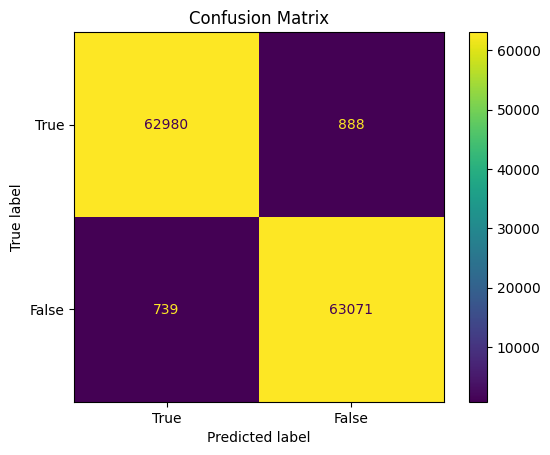

In [60]:
#confusion matrix

cnf_matrix=confusion_matrix(y_test,predict2)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=[True, False]).plot()
plt.title('Confusion Matrix')
plt.show()

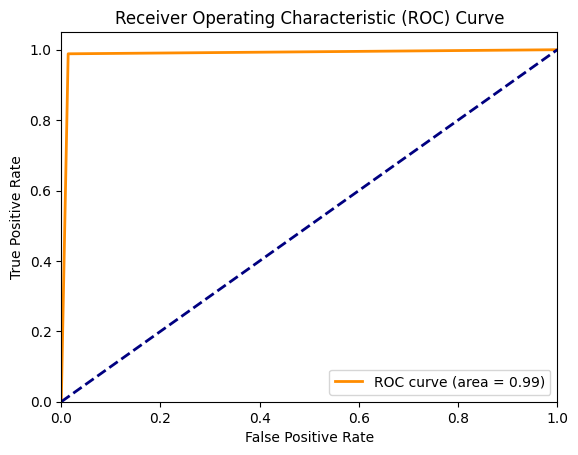

In [61]:
#AUC/ROC curve
y_pred_proba=dtc.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _=roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

RandomForest Classifier and it's results

In [62]:

rf2=RandomForestClassifier(n_estimators=60,random_state=42)

scores = cross_val_score(rf2,X_train,y_train,cv=5,scoring='accuracy')
# Printing the scores
print("Accuracy scores:", scores)
print("the Training accuracy:",scores.mean()*100)

rf2.fit(X_train,y_train)
predict2=rf2.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,predict2)*100)
print("the f1 score is : ",f1_score(y_test, predict2)*100)  #f1 Score
print("classification report:\n ",classification_report(y_test,predict2)) #Classification Report

Accuracy scores: [0.91547925 0.91418693 0.91205545 0.91324707 0.91200363]
the Training accuracy: 91.33944648763078
Accuracy:  91.50205986935886
the f1 score is :  91.32596773419888
classification report:
                precision    recall  f1-score   support

           0       0.90      0.93      0.92     63868
           1       0.93      0.90      0.91     63810

    accuracy                           0.92    127678
   macro avg       0.92      0.92      0.91    127678
weighted avg       0.92      0.92      0.91    127678



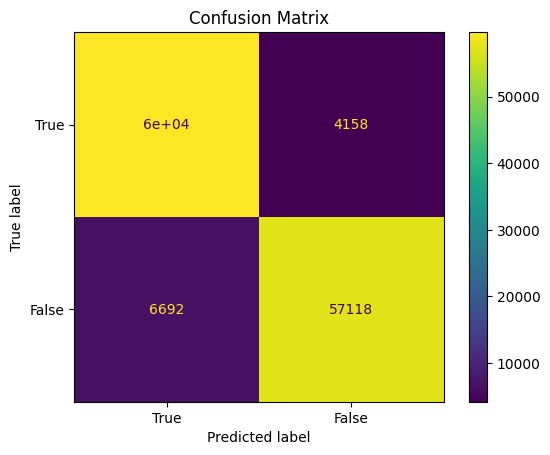

In [63]:

#confusion matrix

cnf_matrix=confusion_matrix(y_test,predict2)
ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=[True, False]).plot()
plt.title('Confusion Matrix')
plt.show()

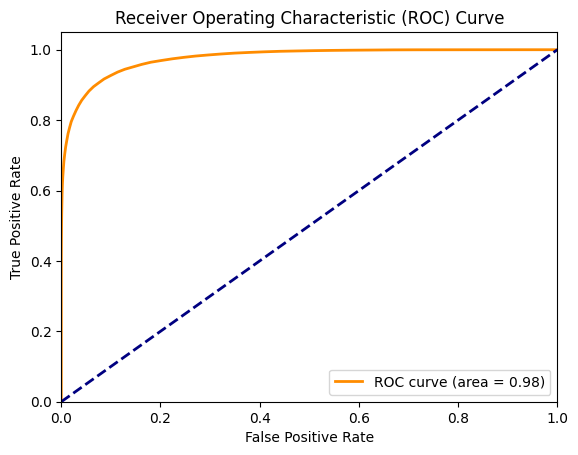

In [64]:
#AUC/ROC curve
y_pred_proba = rf2.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
pred=dtc.predict(Final_data_test)
c=0
for i in pred:
    if i==1:
        c+=1
print("Fraud: ",c)
print("Genuiene: ",len(pred)-c)

Fraud:  102
Genuiene:  135290


In [66]:
pred1=rf2.predict(Final_data_test)
c=0
for i in pred1:
    if i==1:
        c+=1
print("Fraud: ",c)
print("Genuiene: ",len(pred1)-c)

Fraud:  102539
Genuiene:  32853


In [67]:
import joblib  # For saving scikit-learn models (or similar libraries)

joblib.dump(dtc, 'model.pkl')  # Save the model to a file

['model.pkl']